Implied Vol Surface
Visualize the implied vol surface for the rBergomi model and heston model.

In [ ]:
from datetime import datetime

import numpy as np
from matplotlib import pyplot as plt
from qablet.base.flags import Stats

from data.samples import rbergomi_data, heston_data
from qablet.heston.mc import HestonMCModel
from src.model.rbergomi import rBergomiMCModel
from src.utils import iv_surface

### Contract
In order to recostruct the volsurface we will define a contract which is a series of forwards paying at different option expiration dates. Then we will use the cashflow stats to get the values at all paths, from which we can reconstrcut option prices for different strikes and maturities.

Get price and stats. We are mainly interested in stats

In [ ]:
prc_dt = datetime(2013, 8, 14)
ticker = "SPX"
spot = 1685.39

# We will define a forwards for various expirations
expirations = [
    # datetime(2013, 8, 16),  # in two days
    # datetime(2013, 8, 23),  # weekly
    datetime(2013, 8, 30),  # weekly
    datetime(2013, 9, 20),  # monthly
    datetime(2013, 12, 20),  # quarterly
    datetime(2014, 3, 21),  # quarterly
    datetime(2014, 6, 20),  # quarterly
]

logK = np.arange(-0.25, 0.1, 0.01)
strikes = spot * np.exp(logK)
atm_idx = 25

### Bergomi Vol Surface

In [ ]:
model = rBergomiMCModel()
dataset = rbergomi_data()
dataset["MC"]["FLAGS"] = Stats.CASHFLOW

bergomi_iv = iv_surface("SPX", model, dataset, strikes, expirations)

### Heston Vol Surface

In [ ]:
model = HestonMCModel()
dataset = heston_data()
dataset["MC"]["FLAGS"] = Stats.CASHFLOW

heston_iv = iv_surface("SPX", model, dataset, strikes, expirations)

### Plot Each Expiration Smile

Text(0.5, 1.0, 'Heston IV Surface')

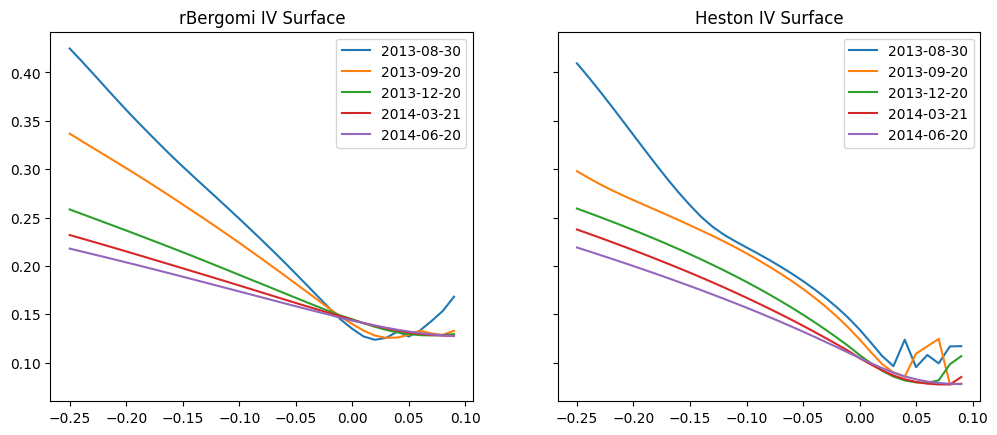

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(12)

for i, exp in enumerate(expirations):
    ax1.plot(logK, bergomi_iv[i, :], label=exp.strftime("%Y-%m-%d"))
ax1.legend()
ax1.set_title("rBergomi IV Surface")

for i, exp in enumerate(expirations):
    ax2.plot(logK, heston_iv[i, :], label=exp.strftime("%Y-%m-%d"))
ax2.legend()
ax2.set_title("Heston IV Surface")

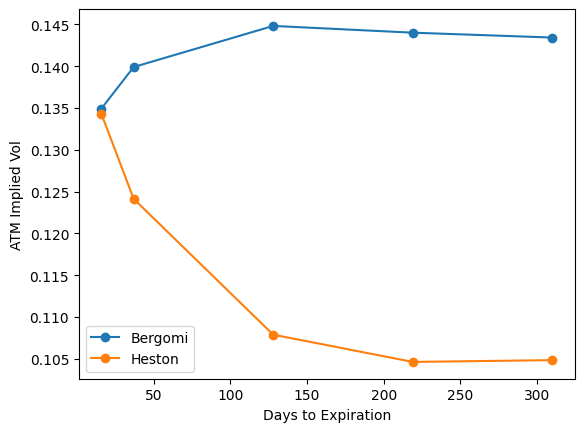

In [ ]:
for iv, label in zip([bergomi_iv, heston_iv], ["Bergomi", "Heston"]):
    plt.plot(
        [(exp - prc_dt).days for exp in expirations],
        iv[:, atm_idx],
        label=label,
        marker="o",
    )
plt.xlabel("Days to Expiration")
plt.ylabel("ATM Implied Vol")
plt.legend()